<a href="https://colab.research.google.com/github/AmiMunshi/Image_Processing/blob/master/Spatial_domain_High_pass_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

High Pass Filtering in Spatial Domain- Laplacian Mask


In [1]:
#import cv2, numpy, matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img= cv2.imread('/blurry.tif',0) #Read the image
m,n=img.shape #Obtain number of rows and columns of the image

In [5]:
#Laplacian mask
mask= np.array([[0,1,0],[1,-4,1],[0,1,0]])

In [6]:
#Convolve the 3X3 mask over the image 

img_new=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        temp= img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
      
        img_new[i,j]=temp
#img_new=img_new.astype(np.uint8)
cv2.imwrite('laplacian1.png',img_new)

True

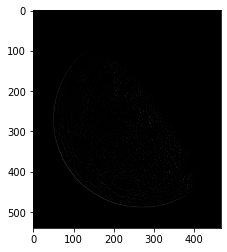

In [9]:
plt.imshow(img_new,cmap="gray", vmin=0, vmax= 255)

In [11]:
fmin=np.min(img_new)
print(fmin)
fmax=np.max(img_new)
print(fmax)

-106.0
83.0


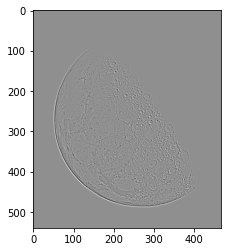

In [12]:
#scaling
#fm=f−min⁡(f)
#fs=K[fm/max⁡(fm ) , for 8 bit image, K=255 
fm= img_new- fmin
img_sca= 255*fm/np.max(fm)
plt.imshow(img_sca, cmap="gray")

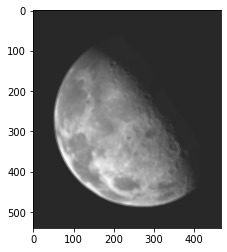

In [13]:
img_back= img+img_sca
plt.imshow(img_back,cmap="gray")

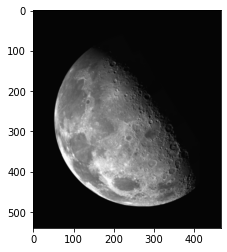

In [14]:
#Enhancing the image and preserving the background using Laplacian mask
#g(x,y)= 5f(x,y)− [f(x+1,y)+f(x−1,y)+f(x,y+1)+f(x,y−1)]
g=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        g[i,j]=9*img[i,j]-img[i-1,j]-img[i+1,j]- img[i,j+1]-img[i,j-1]
plt.imshow(g, cmap="gray")


Text(0.5, 1.0, 'Laplacian filtered image with back ground preserved')

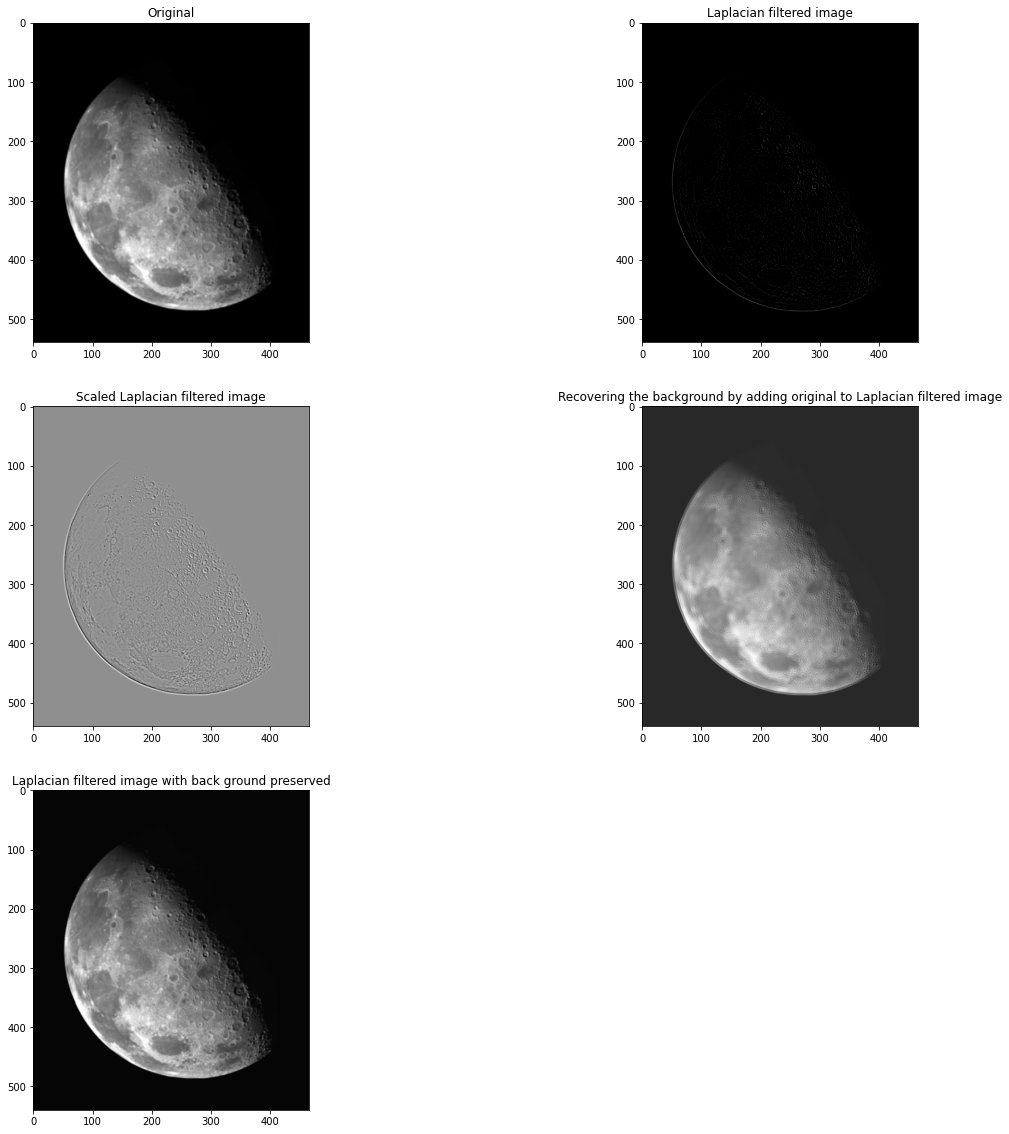

In [15]:
fig = plt.figure(figsize=(20,20),facecolor='w')
plt.subplot(3,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(3,2,2)
plt.imshow(img_new, cmap="gray", vmax=255,vmin=0)
plt.title("Laplacian filtered image")
plt.subplot(3,2,3)
plt.imshow(img_sca, cmap="gray")
plt.title("Scaled Laplacian filtered image")
plt.subplot(3,2,4)
plt.imshow(img_back, cmap="gray")
plt.title("Recovering the background by adding original to Laplacian filtered image")
plt.subplot(3,2,5)
plt.imshow(g, cmap="gray")
plt.title("Laplacian filtered image with back ground preserved")